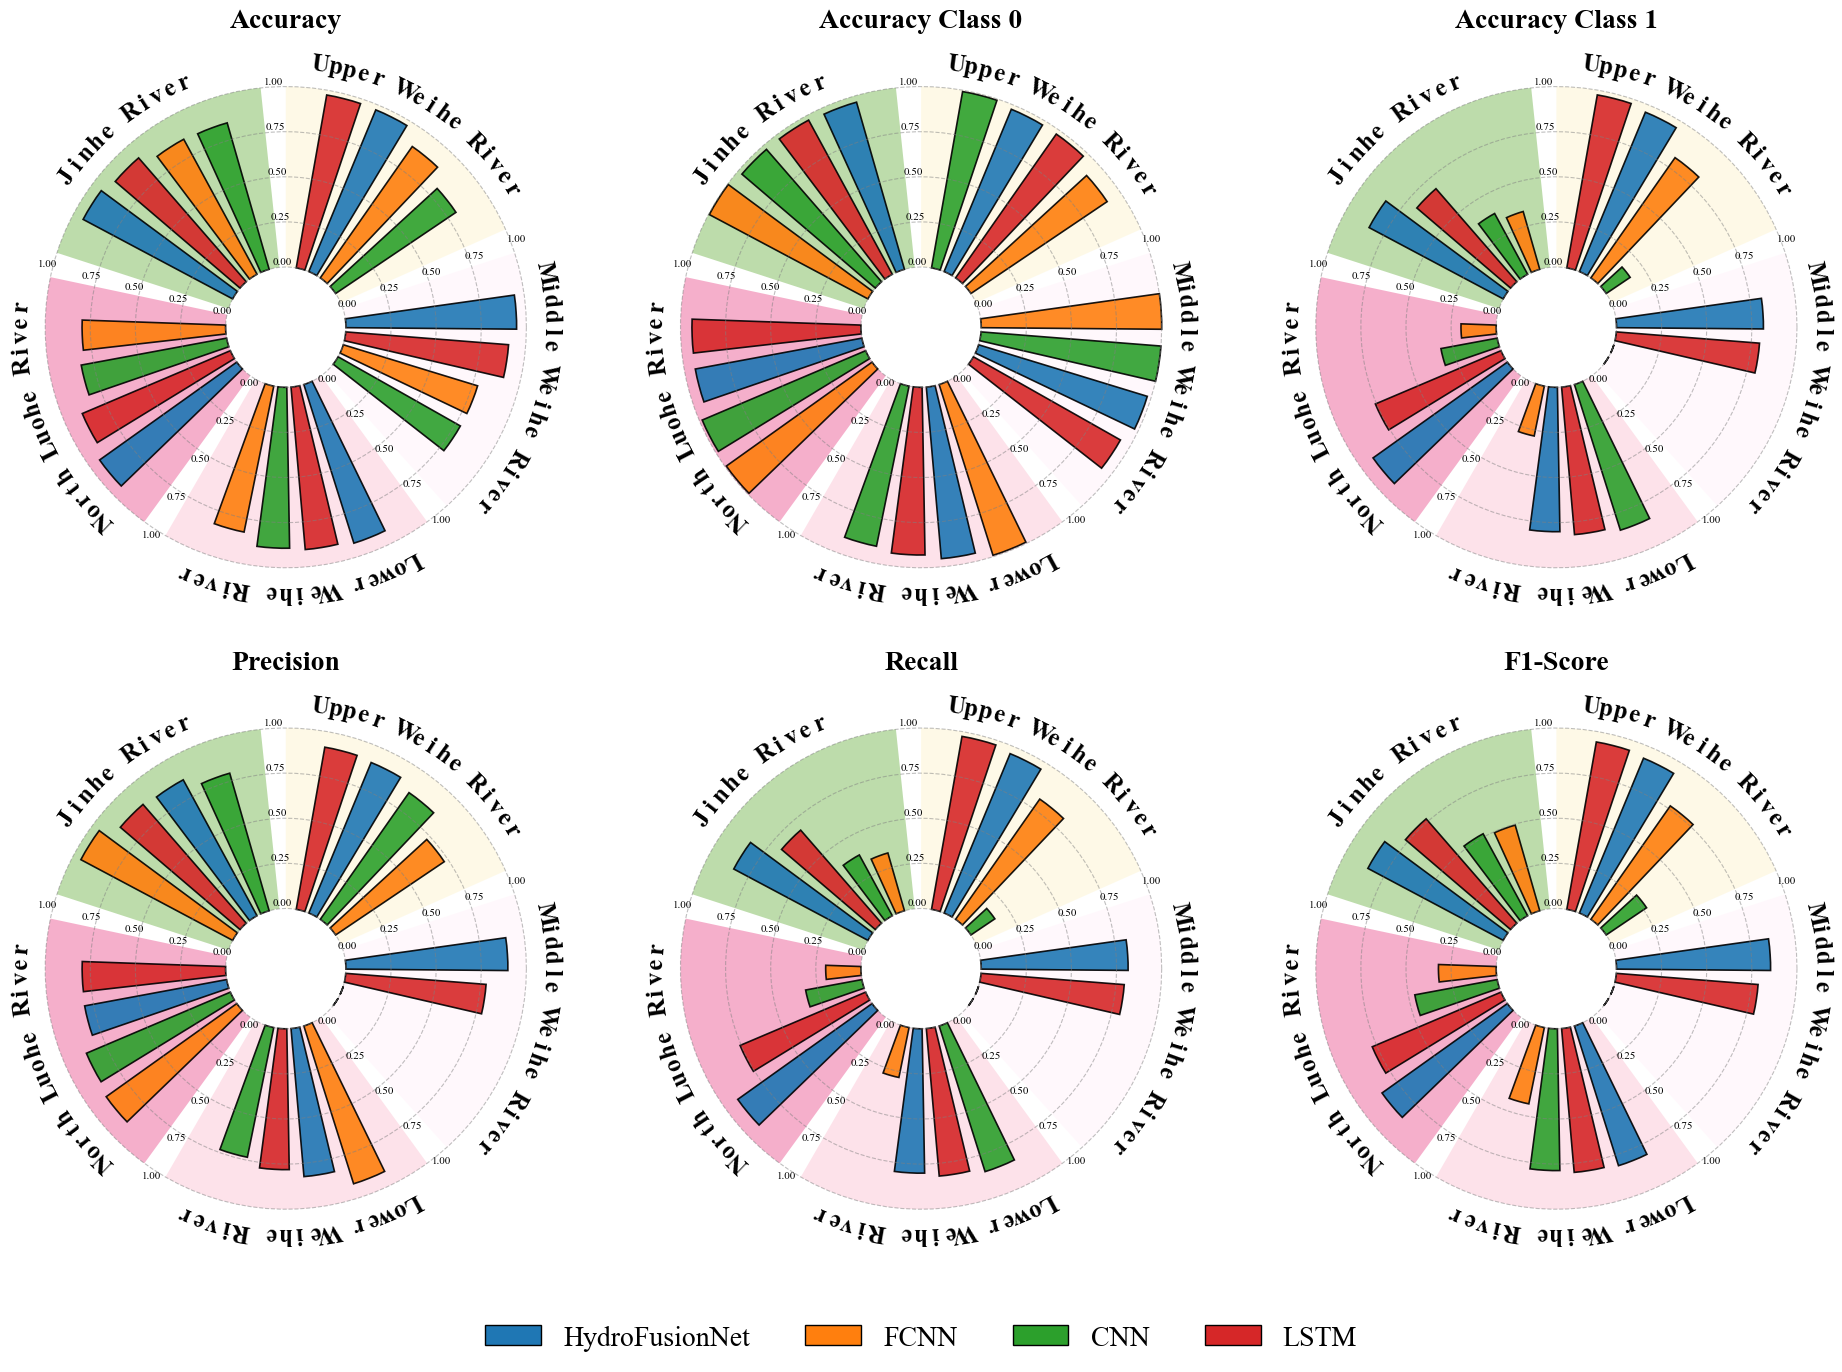

图像已保存为 'model_performance.jpg'


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.colors as mcolors
import os

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15

class CircularBarPlot:
    def __init__(self, outer_radius, inner_radius, gap_angle, text_radius):
        """初始化类别、颜色和参数"""
        self.categories = ["Upper Weihe River", "Middle Weihe River", "Lower Weihe River", 
                          "North Luohe River", "Jinhe River"]
        self.models = ["HydroFusionNet", "FCNN", "CNN", "LSTM"]
        self.colors = {
            "HydroFusionNet": "#1f77b4",    # 深蓝色
            "FCNN": "#ff7f0e",     # 橙色
            "CNN": "#2ca02c",      # 绿色
            "LSTM": "#d62728"      # 红色
        }
        self.category_colors = {
            "Upper Weihe River": "#fdf2c5", 
            "Middle Weihe River": "#ffeff9", 
            "Lower Weihe River": "#fab8cb", 
            "North Luohe River": "#e6387e", 
            "Jinhe River": "#5aa82d"
        }
        self.start_angle = 90  # 从顶部开始
        self.gap_angle = gap_angle  # 扇形间隙
        self.n_sectors = len(self.categories)
        self.sector_angle = (360 - self.gap_angle * self.n_sectors) / self.n_sectors  # 扇形角度
        self.outer_radius = outer_radius  # 外圆半径
        self.inner_radius = inner_radius  # 内圆半径
        self.text_radius = text_radius    # curved_text的显示半径
        
        # 硬编码的数据
        self.data = self.create_hardcoded_data()
    
    def create_hardcoded_data(self):
        """创建硬编码的性能数据"""
        # 定义流域名称映射
        watershed_mapping = {
            "渭河上游": "Upper Weihe River",
            "渭河中游": "Middle Weihe River", 
            "渭河下游": "Lower Weihe River",
            "北洛河": "North Luohe River",
            "泾河": "Jinhe River"
        }
        
        # 硬编码的原始数据
        raw_data = {
            "HydroFusionNet": {
                "渭河上游": {"accuracy": 0.9699, "accuracy_class0": 0.9735, "accuracy_class1": 0.9559, "precision": 0.9028, "recall": 0.9559, "f1": 0.9286},
                "渭河中游": {"accuracy": 0.9457, "accuracy_class0": 0.9775, "accuracy_class1": 0.8140, "precision": 0.8974, "recall": 0.8140, "f1": 0.8537},
                "渭河下游": {"accuracy": 0.9217, "accuracy_class0": 0.9542, "accuracy_class1": 0.8000, "precision": 0.8235, "recall": 0.8000, "f1": 0.8116},
                "北洛河": {"accuracy": 0.9337, "accuracy_class0": 0.9389, "accuracy_class1": 0.9143, "precision": 0.8000, "recall": 0.9143, "f1": 0.8533},
                "泾河": {"accuracy": 0.9384, "accuracy_class0": 0.9635, "accuracy_class1": 0.8421, "precision": 0.8571, "recall": 0.8421, "f1": 0.8496}
            },
            "LSTM": {
                "渭河上游": {"accuracy": 0.9729, "accuracy_class0": 0.9728, "accuracy_class1": 0.9733, "precision": 0.9125, "recall": 0.9733, "f1": 0.9419},
                "渭河中游": {"accuracy": 0.9050, "accuracy_class0": 0.9360, "accuracy_class1": 0.7959, "precision": 0.7800, "recall": 0.7959, "f1": 0.7879},
                "渭河下游": {"accuracy": 0.9036, "accuracy_class0": 0.9291, "accuracy_class1": 0.8205, "precision": 0.7805, "recall": 0.8205, "f1": 0.8000},
                "北洛河": {"accuracy": 0.8916, "accuracy_class0": 0.9360, "accuracy_class1": 0.7561, "precision": 0.7949, "recall": 0.7561, "f1": 0.7750},
                "泾河": {"accuracy": 0.9094, "accuracy_class0": 0.9722, "accuracy_class1": 0.6833, "precision": 0.8723, "recall": 0.6833, "f1": 0.7664}
            },
            "FCNN": {
                "渭河上游": {"accuracy": 0.8886, "accuracy_class0": 0.9105, "accuracy_class1": 0.8133, "precision": 0.7262, "recall": 0.8133, "f1": 0.7673},
                "渭河中游": {"accuracy": 0.7783, "accuracy_class0": 1.0000, "accuracy_class1": 0.0000, "precision": 0.0000, "recall": 0.0000, "f1": 0.0000},
                "渭河下游": {"accuracy": 0.8253, "accuracy_class0": 0.9921, "accuracy_class1": 0.2821, "precision": 0.9167, "recall": 0.2821, "f1": 0.4314},
                "北洛河": {"accuracy": 0.7952, "accuracy_class0": 0.9920, "accuracy_class1": 0.1951, "precision": 0.8889, "recall": 0.1951, "f1": 0.3200},
                "泾河": {"accuracy": 0.8514, "accuracy_class0": 0.9954, "accuracy_class1": 0.3333, "precision": 0.9524, "recall": 0.3333, "f1": 0.4938}
            },
            "CNN": {
                "渭河上游": {"accuracy": 0.8042, "accuracy_class0": 0.9922, "accuracy_class1": 0.1600, "precision": 0.8571, "recall": 0.1600, "f1": 0.2697},
                "渭河中游": {"accuracy": 0.7783, "accuracy_class0": 1.0000, "accuracy_class1": 0.0000, "precision": 0.0000, "recall": 0.0000, "f1": 0.0000},
                "渭河下游": {"accuracy": 0.8916, "accuracy_class0": 0.9055, "accuracy_class1": 0.8462, "precision": 0.7333, "recall": 0.8462, "f1": 0.7857},
                "北洛河": {"accuracy": 0.8193, "accuracy_class0": 0.9840, "accuracy_class1": 0.3171, "precision": 0.8667, "recall": 0.3171, "f1": 0.4643},
                "泾河": {"accuracy": 0.8442, "accuracy_class0": 0.9722, "accuracy_class1": 0.3833, "precision": 0.7931, "recall": 0.3833, "f1": 0.5169}
            }
        }
        
        # 转换为DataFrame格式
        data_dict = {
            "accuracy": [],
            "accuracy_class0": [],
            "accuracy_class1": [],
            "precision": [],
            "recall": [],
            "f1": []
        }
        
        for metric in ["accuracy", "accuracy_class0", "accuracy_class1", "precision", "recall", "f1"]:
            metric_data = []
            for model in self.models:
                for watershed_cn, watershed_en in watershed_mapping.items():
                    metric_data.append({
                        "category": watershed_en,
                        "model": model,
                        "value": raw_data[model][watershed_cn][metric]
                    })
            data_dict[metric] = pd.DataFrame(metric_data)
        
        return data_dict

    def add_curved_text(self, ax, text, mid_angle, radius, direction='counterclockwise'):
        """在指定角度和半径处添加弯曲的标签文本"""
        text_length = len(text)
        char_angle_width = 3  # 每个字符占用3度
        total_text_angle = text_length * char_angle_width
        
        if direction == 'counterclockwise':
            start_angle = mid_angle + total_text_angle / 2
            end_angle = mid_angle - total_text_angle / 2
            angles = np.linspace(start_angle, end_angle, text_length)
        else:
            start_angle = mid_angle - total_text_angle / 2
            end_angle = mid_angle + total_text_angle / 2
            angles = np.linspace(start_angle, end_angle, text_length)
        
        for i, char in enumerate(text):
            char_rad = np.radians(angles[i])
            x = radius * np.cos(char_rad)
            y = radius * np.sin(char_rad)
            rotation = angles[i] - 90
            if 90 < angles[i] < 270:
                rotation += 180
            ax.text(x, y, char, ha='center', va='center', fontsize=18, weight='bold',
                    rotation=rotation, family='Times New Roman')

    def get_sorted_models_by_metric(self, data, category, metric_name):
        """根据指标值对模型进行排序（降序）"""
        category_data = data[data['category'] == category]
        if category_data.empty:
            return self.models
        
        # 计算每个模型在该类别下的平均值
        model_scores = []
        for model in self.models:
            model_data = category_data[category_data['model'] == model]
            if not model_data.empty:
                score = model_data['value'].values[0]
                model_scores.append((model, score))
            else:
                model_scores.append((model, 0))
        
        # 按分数降序排序
        model_scores.sort(key=lambda x: x[1], reverse=True)
        return [model for model, score in model_scores]

    def plot_model(self, data, ax, metric_name):
        """绘制环状图"""
        ax.clear()
        ax.set_xlim(-self.outer_radius - 0.2, self.outer_radius + 0.2)
        ax.set_ylim(-self.outer_radius - 0.2, self.outer_radius + 0.2)
        ax.set_aspect('equal')
        ax.axis('off')
        
        # 修改：增大子图标题字体大小，使其更加突出
        ax.set_title(metric_name, fontsize=20, weight='bold', pad=25)
        
        # 绘制扇形背景
        for i, category in enumerate(self.categories):
            sector_start = self.start_angle - i * (self.sector_angle + self.gap_angle)
            sector_end = sector_start - self.sector_angle
            bg_color = mcolors.to_rgba(self.category_colors[category], alpha=0.4)
            main_wedge = Wedge((0, 0), self.outer_radius, sector_end, sector_start,
                              width=self.outer_radius - self.inner_radius, facecolor=bg_color,
                              edgecolor='none', zorder=1)
            ax.add_patch(main_wedge)
            
            # 添加弯曲的类别标签（中轴线上）
            mid_angle = (sector_start + sector_end) / 2
            self.add_curved_text(ax, category, mid_angle, self.text_radius, direction='counterclockwise')
        
        # 绘制柱状图（按精度排序）
        for i, category in enumerate(self.categories):
            sector_start = self.start_angle - i * (self.sector_angle + self.gap_angle)
            sector_end = sector_start - self.sector_angle
            mid_angle = (sector_start + sector_end) / 2
            
            # 筛选该类别的数据
            category_data = data[data['category'] == category]
            
            if not category_data.empty:
                # 修改：根据精度高低对模型进行排序
                sorted_models = self.get_sorted_models_by_metric(data, category, metric_name)
                
                bar_width_angle = 8.5
                gap_width_angle = 4
                n_bars = len(sorted_models)
                total_width_angle = n_bars * bar_width_angle + (n_bars - 1) * gap_width_angle
                start_angle = mid_angle + total_width_angle / 2
                
                for j, model in enumerate(sorted_models):
                    bar_end_angle = start_angle - j * (bar_width_angle + gap_width_angle)
                    bar_start_angle = bar_end_angle - bar_width_angle
                    
                    # 获取该模型在该类别上的精度值
                    model_data = category_data[category_data['model'] == model]
                    if not model_data.empty:
                        bar_height = model_data['value'].values[0]
                        if bar_height > 1:
                            bar_height /= 100  # 如果是百分比形式
                        
                        inner_radius = self.inner_radius
                        outer_radius = inner_radius + bar_height * (self.outer_radius - self.inner_radius)
                        
                        color = self.colors[model]
                        
                        bar_wedge = Wedge((0, 0), outer_radius, bar_start_angle, bar_end_angle,
                                         width=outer_radius - inner_radius,
                                         facecolor=color,
                                         edgecolor='black', linewidth=1.2, alpha=0.9, zorder=2)
                        ax.add_patch(bar_wedge)
        
        # 绘制径向刻度线和标签
        for tick_val in np.arange(0.0, 1.1, 0.25):
            tick_radius = self.inner_radius + tick_val * (self.outer_radius - self.inner_radius)
            angles = np.linspace(0, 360, 100)
            x_ticks = tick_radius * np.cos(np.radians(angles))
            y_ticks = tick_radius * np.sin(np.radians(angles))
            ax.plot(x_ticks, y_ticks, '--', color='grey', alpha=0.5, linewidth=0.8, zorder=3)
            
            # 在间隙中心添加刻度标签
            for i in range(self.n_sectors):
                gap_center_angle = self.start_angle - (i * (self.sector_angle + self.gap_angle) + self.sector_angle + self.gap_angle / 2)
                gap_center_rad = np.radians(gap_center_angle)
                label_x = (tick_radius + 0.05) * np.cos(gap_center_rad)
                label_y = (tick_radius + 0.05) * np.sin(gap_center_rad)
                ax.text(label_x, label_y, f'{tick_val:.2f}', ha='center', va='center',
                       fontsize=8, color='black', zorder=4)

def create_circular_plots(outer_radius, inner_radius, gap_angle, text_radius):
    """创建并保存环状图"""
    plotter = CircularBarPlot(outer_radius=outer_radius, inner_radius=inner_radius, 
                             gap_angle=gap_angle, text_radius=text_radius)
    
    # 修改：增加图像整体大小和调整子图间距
    fig, axes = plt.subplots(2, 3, figsize=(20, 14))
    
    # 绘制六个指标的图
    plotter.plot_model(plotter.data["accuracy"], axes[0, 0], "Accuracy")
    plotter.plot_model(plotter.data["accuracy_class0"], axes[0, 1], "Accuracy Class 0")
    plotter.plot_model(plotter.data["accuracy_class1"], axes[0, 2], "Accuracy Class 1")
    plotter.plot_model(plotter.data["precision"], axes[1, 0], "Precision")
    plotter.plot_model(plotter.data["recall"], axes[1, 1], "Recall")
    plotter.plot_model(plotter.data["f1"], axes[1, 2], "F1-Score")
    
    # 添加共享图例
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color, edgecolor='black', linewidth=1) 
                       for color in plotter.colors.values()]
    fig.legend(legend_elements, plotter.colors.keys(), loc='lower center', 
               ncol=4, fontsize=20, frameon=False, bbox_to_anchor=(0.5, -0.02))
    
    # 修改：调整布局参数，增加上下行子图间的间距
    plt.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08, 
                       hspace=0.2, wspace=0.2)
    
    # 保存图像
    plt.savefig("model_performance.jpg", dpi=600, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.show()
    
    print("图像已保存为 'model_performance.jpg'")

# 运行函数，参数集中在此处调整
create_circular_plots(outer_radius=2, inner_radius=0.5, gap_angle=6, text_radius=2.2)


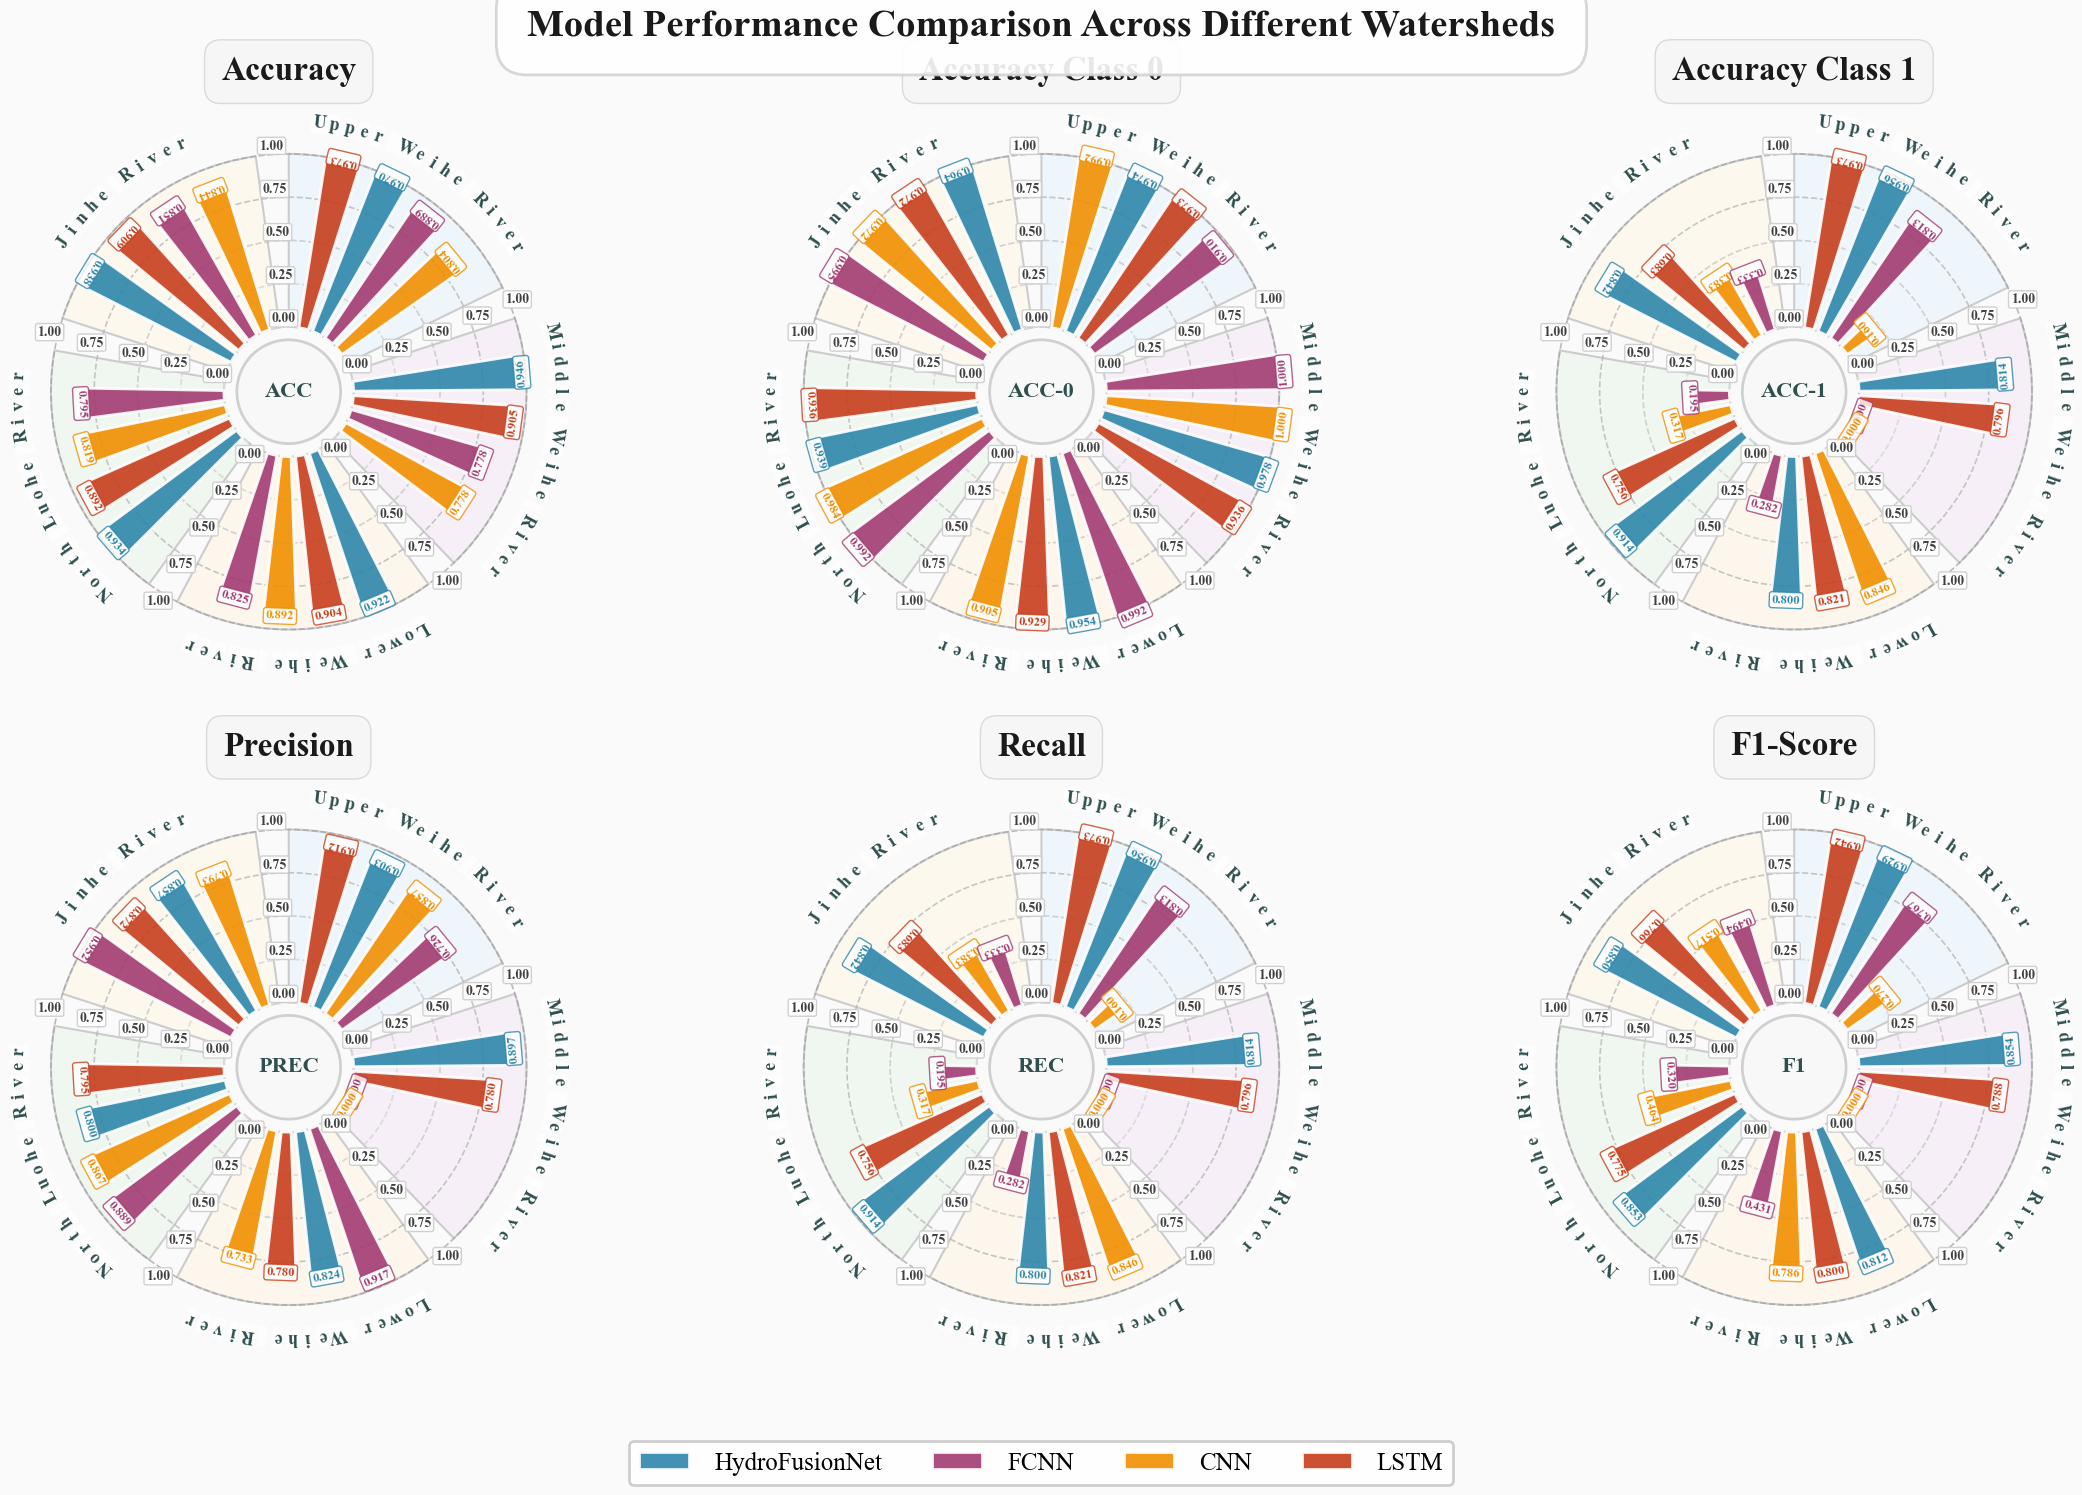

优化后的高清图像已保存为 'model_performance_optimized.png'
分辨率: 300 DPI
格式: PNG


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.colors as mcolors
import os

# 设置全局字体和样式
plt.rcParams['font.family'] = ['Times New Roman', 'DejaVu Sans']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.alpha'] = 0.3

class CircularBarPlot:
    def __init__(self, outer_radius, inner_radius, gap_angle, text_radius):
        """初始化类别、颜色和参数"""
        self.categories = ["Upper Weihe River", "Middle Weihe River", "Lower Weihe River", 
                          "North Luohe River", "Jinhe River"]
        self.models = ["HydroFusionNet", "FCNN", "CNN", "LSTM"]
        
        # 优化颜色方案 - 使用更专业的配色
        self.colors = {
            "HydroFusionNet": "#2E86AB",    # 深蓝色
            "FCNN": "#A23B72",             # 深紫红
            "CNN": "#F18F01",              # 橙色
            "LSTM": "#C73E1D"              # 深红色
        }
        
        # 优化类别背景颜色 - 使用渐变色系
        self.category_colors = {
            "Upper Weihe River": "#E3F2FD", 
            "Middle Weihe River": "#F3E5F5", 
            "Lower Weihe River": "#FFF3E0", 
            "North Luohe River": "#E8F5E8", 
            "Jinhe River": "#FFF8E1"
        }
        
        self.start_angle = 90  # 从顶部开始
        self.gap_angle = gap_angle  # 扇形间隙
        self.n_sectors = len(self.categories)
        self.sector_angle = (360 - self.gap_angle * self.n_sectors) / self.n_sectors  # 扇形角度
        self.outer_radius = outer_radius  # 外圆半径
        self.inner_radius = inner_radius  # 内圆半径
        self.text_radius = text_radius    # curved_text的显示半径
        
        # 硬编码的数据
        self.data = self.create_hardcoded_data()
    
    def create_hardcoded_data(self):
        """创建硬编码的性能数据"""
        # 定义流域名称映射
        watershed_mapping = {
            "渭河上游": "Upper Weihe River",
            "渭河中游": "Middle Weihe River", 
            "渭河下游": "Lower Weihe River",
            "北洛河": "North Luohe River",
            "泾河": "Jinhe River"
        }
        
        # 硬编码的原始数据
        raw_data = {
            "HydroFusionNet": {
                "渭河上游": {"accuracy": 0.9699, "accuracy_class0": 0.9735, "accuracy_class1": 0.9559, "precision": 0.9028, "recall": 0.9559, "f1": 0.9286},
                "渭河中游": {"accuracy": 0.9457, "accuracy_class0": 0.9775, "accuracy_class1": 0.8140, "precision": 0.8974, "recall": 0.8140, "f1": 0.8537},
                "渭河下游": {"accuracy": 0.9217, "accuracy_class0": 0.9542, "accuracy_class1": 0.8000, "precision": 0.8235, "recall": 0.8000, "f1": 0.8116},
                "北洛河": {"accuracy": 0.9337, "accuracy_class0": 0.9389, "accuracy_class1": 0.9143, "precision": 0.8000, "recall": 0.9143, "f1": 0.8533},
                "泾河": {"accuracy": 0.9384, "accuracy_class0": 0.9635, "accuracy_class1": 0.8421, "precision": 0.8571, "recall": 0.8421, "f1": 0.8496}
            },
            "LSTM": {
                "渭河上游": {"accuracy": 0.9729, "accuracy_class0": 0.9728, "accuracy_class1": 0.9733, "precision": 0.9125, "recall": 0.9733, "f1": 0.9419},
                "渭河中游": {"accuracy": 0.9050, "accuracy_class0": 0.9360, "accuracy_class1": 0.7959, "precision": 0.7800, "recall": 0.7959, "f1": 0.7879},
                "渭河下游": {"accuracy": 0.9036, "accuracy_class0": 0.9291, "accuracy_class1": 0.8205, "precision": 0.7805, "recall": 0.8205, "f1": 0.8000},
                "北洛河": {"accuracy": 0.8916, "accuracy_class0": 0.9360, "accuracy_class1": 0.7561, "precision": 0.7949, "recall": 0.7561, "f1": 0.7750},
                "泾河": {"accuracy": 0.9094, "accuracy_class0": 0.9722, "accuracy_class1": 0.6833, "precision": 0.8723, "recall": 0.6833, "f1": 0.7664}
            },
            "FCNN": {
                "渭河上游": {"accuracy": 0.8886, "accuracy_class0": 0.9105, "accuracy_class1": 0.8133, "precision": 0.7262, "recall": 0.8133, "f1": 0.7673},
                "渭河中游": {"accuracy": 0.7783, "accuracy_class0": 1.0000, "accuracy_class1": 0.0000, "precision": 0.0000, "recall": 0.0000, "f1": 0.0000},
                "渭河下游": {"accuracy": 0.8253, "accuracy_class0": 0.9921, "accuracy_class1": 0.2821, "precision": 0.9167, "recall": 0.2821, "f1": 0.4314},
                "北洛河": {"accuracy": 0.7952, "accuracy_class0": 0.9920, "accuracy_class1": 0.1951, "precision": 0.8889, "recall": 0.1951, "f1": 0.3200},
                "泾河": {"accuracy": 0.8514, "accuracy_class0": 0.9954, "accuracy_class1": 0.3333, "precision": 0.9524, "recall": 0.3333, "f1": 0.4938}
            },
            "CNN": {
                "渭河上游": {"accuracy": 0.8042, "accuracy_class0": 0.9922, "accuracy_class1": 0.1600, "precision": 0.8571, "recall": 0.1600, "f1": 0.2697},
                "渭河中游": {"accuracy": 0.7783, "accuracy_class0": 1.0000, "accuracy_class1": 0.0000, "precision": 0.0000, "recall": 0.0000, "f1": 0.0000},
                "渭河下游": {"accuracy": 0.8916, "accuracy_class0": 0.9055, "accuracy_class1": 0.8462, "precision": 0.7333, "recall": 0.8462, "f1": 0.7857},
                "北洛河": {"accuracy": 0.8193, "accuracy_class0": 0.9840, "accuracy_class1": 0.3171, "precision": 0.8667, "recall": 0.3171, "f1": 0.4643},
                "泾河": {"accuracy": 0.8442, "accuracy_class0": 0.9722, "accuracy_class1": 0.3833, "precision": 0.7931, "recall": 0.3833, "f1": 0.5169}
            }
        }
        
        # 转换为DataFrame格式
        data_dict = {
            "accuracy": [],
            "accuracy_class0": [],
            "accuracy_class1": [],
            "precision": [],
            "recall": [],
            "f1": []
        }
        
        for metric in ["accuracy", "accuracy_class0", "accuracy_class1", "precision", "recall", "f1"]:
            metric_data = []
            for model in self.models:
                for watershed_cn, watershed_en in watershed_mapping.items():
                    metric_data.append({
                        "category": watershed_en,
                        "model": model,
                        "value": raw_data[model][watershed_cn][metric]
                    })
            data_dict[metric] = pd.DataFrame(metric_data)
        
        return data_dict

    def add_curved_text(self, ax, text, mid_angle, radius, direction='counterclockwise'):
        """在指定角度和半径处添加弯曲的标签文本 - 优化版本"""
        text_length = len(text)
        char_angle_width = 3  # 每个字符占用3度
        total_text_angle = text_length * char_angle_width
        
        if direction == 'counterclockwise':
            start_angle = mid_angle + total_text_angle / 2
            end_angle = mid_angle - total_text_angle / 2
            angles = np.linspace(start_angle, end_angle, text_length)
        else:
            start_angle = mid_angle - total_text_angle / 2
            end_angle = mid_angle + total_text_angle / 2
            angles = np.linspace(start_angle, end_angle, text_length)
        
        for i, char in enumerate(text):
            char_rad = np.radians(angles[i])
            x = radius * np.cos(char_rad)
            y = radius * np.sin(char_rad)
            rotation = angles[i] - 90
            if 90 < angles[i] < 270:
                rotation += 180
            
            # 优化文本样式
            ax.text(x, y, char, ha='center', va='center', fontsize=13, weight='bold',
                    rotation=rotation, family='Times New Roman', color='#2F4F4F',
                    bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.8, edgecolor='none'))

    def get_sorted_models_by_metric(self, data, category, metric_name):
        """根据指标值对模型进行排序（降序）"""
        category_data = data[data['category'] == category]
        if category_data.empty:
            return self.models
        
        # 计算每个模型在该类别下的平均值
        model_scores = []
        for model in self.models:
            model_data = category_data[category_data['model'] == model]
            if not model_data.empty:
                score = model_data['value'].values[0]
                model_scores.append((model, score))
            else:
                model_scores.append((model, 0))
        
        # 按分数降序排序
        model_scores.sort(key=lambda x: x[1], reverse=True)
        return [model for model, score in model_scores]

    def add_gradient_shadow(self, ax, wedge, color):
        """为wedge添加渐变阴影效果"""
        # 创建稍微偏移的阴影wedge
        shadow_wedge = Wedge(wedge.center, wedge.r, wedge.theta1, wedge.theta2,
                            width=wedge.width, facecolor='black', alpha=0.1, zorder=1)
        # 稍微偏移阴影位置
        shadow_wedge.set_transform(ax.transData)
        ax.add_patch(shadow_wedge)

    def plot_model(self, data, ax, metric_name):
        """绘制环状图 - 优化版本"""
        ax.clear()
        ax.set_xlim(-self.outer_radius - 0.3, self.outer_radius + 0.3)
        ax.set_ylim(-self.outer_radius - 0.3, self.outer_radius + 0.3)
        ax.set_aspect('equal')
        ax.axis('off')
        
        # 优化子图标题样式
        title_color = '#1A1A1A'
        ax.set_title(metric_name, fontsize=24, weight='bold', pad=30, color=title_color,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor='#F5F5F5', alpha=0.8, 
                             edgecolor='#D3D3D3', linewidth=1))
        
        # 绘制扇形背景 - 添加渐变效果
        for i, category in enumerate(self.categories):
            sector_start = self.start_angle - i * (self.sector_angle + self.gap_angle)
            sector_end = sector_start - self.sector_angle
            bg_color = mcolors.to_rgba(self.category_colors[category], alpha=0.5)
            
            # 主背景楔形
            main_wedge = Wedge((0, 0), self.outer_radius, sector_end, sector_start,
                              width=self.outer_radius - self.inner_radius, 
                              facecolor=bg_color, edgecolor='#CCCCCC', linewidth=1.5, zorder=1)
            ax.add_patch(main_wedge)
            
            # 添加弯曲的类别标签
            mid_angle = (sector_start + sector_end) / 2
            self.add_curved_text(ax, category, mid_angle, self.text_radius, direction='counterclockwise')
        
        # 绘制柱状图
        for i, category in enumerate(self.categories):
            sector_start = self.start_angle - i * (self.sector_angle + self.gap_angle)
            sector_end = sector_start - self.sector_angle
            mid_angle = (sector_start + sector_end) / 2
            
            # 筛选该类别的数据
            category_data = data[data['category'] == category]
            
            if not category_data.empty:
                # 根据精度高低对模型进行排序
                sorted_models = self.get_sorted_models_by_metric(data, category, metric_name)
                
                bar_width_angle = 8.5
                gap_width_angle = 4
                n_bars = len(sorted_models)
                total_width_angle = n_bars * bar_width_angle + (n_bars - 1) * gap_width_angle
                start_angle = mid_angle + total_width_angle / 2
                
                for j, model in enumerate(sorted_models):
                    bar_end_angle = start_angle - j * (bar_width_angle + gap_width_angle)
                    bar_start_angle = bar_end_angle - bar_width_angle
                    
                    # 获取该模型在该类别上的精度值
                    model_data = category_data[category_data['model'] == model]
                    if not model_data.empty:
                        bar_height = model_data['value'].values[0]
                        if bar_height > 1:
                            bar_height /= 100  # 如果是百分比形式
                        
                        inner_radius = self.inner_radius
                        outer_radius = inner_radius + bar_height * (self.outer_radius - self.inner_radius)
                        
                        color = self.colors[model]
                        
                        # 创建带阴影效果的柱状图
                        bar_wedge = Wedge((0, 0), outer_radius, bar_start_angle, bar_end_angle,
                                         width=outer_radius - inner_radius,
                                         facecolor=color, edgecolor='white', linewidth=2, 
                                         alpha=0.9, zorder=3)
                        ax.add_patch(bar_wedge)
                        
                        # 添加数值标签（在柱子顶部）
                        label_angle = (bar_start_angle + bar_end_angle) / 2
                        label_radius = outer_radius + 0.05
                        label_rad = np.radians(label_angle)
                        label_x = label_radius * np.cos(label_rad)
                        label_y = label_radius * np.sin(label_rad)
                        
                        ax.text(label_x, label_y, f'{bar_height:.3f}', 
                               ha='center', va='center', fontsize=9, weight='bold',
                               color=color, rotation=label_angle-90 if 90 < label_angle < 270 else label_angle+90,
                               bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8, edgecolor=color))
        
        # 优化径向刻度线和标签
        tick_colors = ['#E0E0E0', '#D0D0D0', '#C0C0C0', '#B0B0B0', '#A0A0A0']
        for idx, tick_val in enumerate(np.arange(0.0, 1.1, 0.25)):
            tick_radius = self.inner_radius + tick_val * (self.outer_radius - self.inner_radius)
            angles = np.linspace(0, 360, 200)
            x_ticks = tick_radius * np.cos(np.radians(angles))
            y_ticks = tick_radius * np.sin(np.radians(angles))
            
            color = tick_colors[min(idx, len(tick_colors)-1)]
            ax.plot(x_ticks, y_ticks, '--', color=color, alpha=0.7, linewidth=1.2, zorder=2)
            
            # 在间隙中心添加刻度标签 - 优化样式
            for i in range(self.n_sectors):
                gap_center_angle = self.start_angle - (i * (self.sector_angle + self.gap_angle) + self.sector_angle + self.gap_angle / 2)
                gap_center_rad = np.radians(gap_center_angle)
                label_x = (tick_radius + 0.08) * np.cos(gap_center_rad)
                label_y = (tick_radius + 0.08) * np.sin(gap_center_rad)
                ax.text(label_x, label_y, f'{tick_val:.2f}', ha='center', va='center',
                       fontsize=10, color='#404040', weight='bold', zorder=4,
                       bbox=dict(boxstyle="round,pad=0.15", facecolor='white', alpha=0.9, edgecolor='#CCCCCC'))

        # 
        # 添加中心装饰圆环
        center_circle = plt.Circle((0, 0), self.inner_radius * 0.8, 
                                  facecolor='#F8F8F8', edgecolor='#CCCCCC', 
                                  linewidth=2, alpha=0.9, zorder=5)
        ax.add_patch(center_circle)
        
        # 在中心添加指标名称缩写
        metric_abbrev = {
            "Accuracy": "ACC",
            "Accuracy Class 0": "ACC-0", 
            "Accuracy Class 1": "ACC-1",
            "Precision": "PREC",
            "Recall": "REC",
            "F1-Score": "F1"
        }
        
        if metric_name in metric_abbrev:
            ax.text(0, 0, metric_abbrev[metric_name], ha='center', va='center',
                   fontsize=16, weight='bold', color='#2F4F4F', zorder=6)

def create_circular_plots(outer_radius, inner_radius, gap_angle, text_radius):
    """创建并保存环状图 - 优化版本"""
    plotter = CircularBarPlot(outer_radius=outer_radius, inner_radius=inner_radius, 
                             gap_angle=gap_angle, text_radius=text_radius)
    
    # 创建更大的画布和优化布局
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    
    # 设置整体背景色
    fig.patch.set_facecolor('#FAFAFA')
    
    # 绘制六个指标的图
    metrics_data = [
        (plotter.data["accuracy"], "Accuracy"),
        (plotter.data["accuracy_class0"], "Accuracy Class 0"),
        (plotter.data["accuracy_class1"], "Accuracy Class 1"),
        (plotter.data["precision"], "Precision"),
        (plotter.data["recall"], "Recall"),
        (plotter.data["f1"], "F1-Score")
    ]
    
    positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
    
    for (data, metric_name), (row, col) in zip(metrics_data, positions):
        plotter.plot_model(data, axes[row, col], metric_name)
        
        # 为每个子图添加边框
        for spine in axes[row, col].spines.values():
            spine.set_visible(False)
    
    # 创建更精美的图例
    legend_elements = []
    for model, color in plotter.colors.items():
        legend_elements.append(plt.Rectangle((0, 0), 1, 1, 
                                           facecolor=color, edgecolor='white', 
                                           linewidth=2, alpha=0.9))
    
    # 添加图例背景框
    legend = fig.legend(legend_elements, plotter.colors.keys(), 
                       loc='lower center', ncol=4, fontsize=18, frameon=True,
                       bbox_to_anchor=(0.5, 0.02), columnspacing=2, 
                       handlelength=2, handletextpad=1)
    
    # 设置图例样式
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('#CCCCCC')
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_alpha(0.95)
    
    # 优化子图间距
    plt.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.12, 
                       hspace=0.25, wspace=0.15)
    
    # 保存为高清PNG格式
    plt.savefig("model_performance_optimized.png", dpi=300, bbox_inches='tight', 
                facecolor='#FAFAFA', edgecolor='none', format='png', 
                pad_inches=0.2)
    
    plt.show()
    
    print("优化后的高清图像已保存为 'model_performance_optimized.png'")
    print("分辨率: 300 DPI")
    print("格式: PNG")

# 运行函数，使用优化参数
create_circular_plots(outer_radius=2.2, inner_radius=0.6, gap_angle=8, text_radius=2.5)

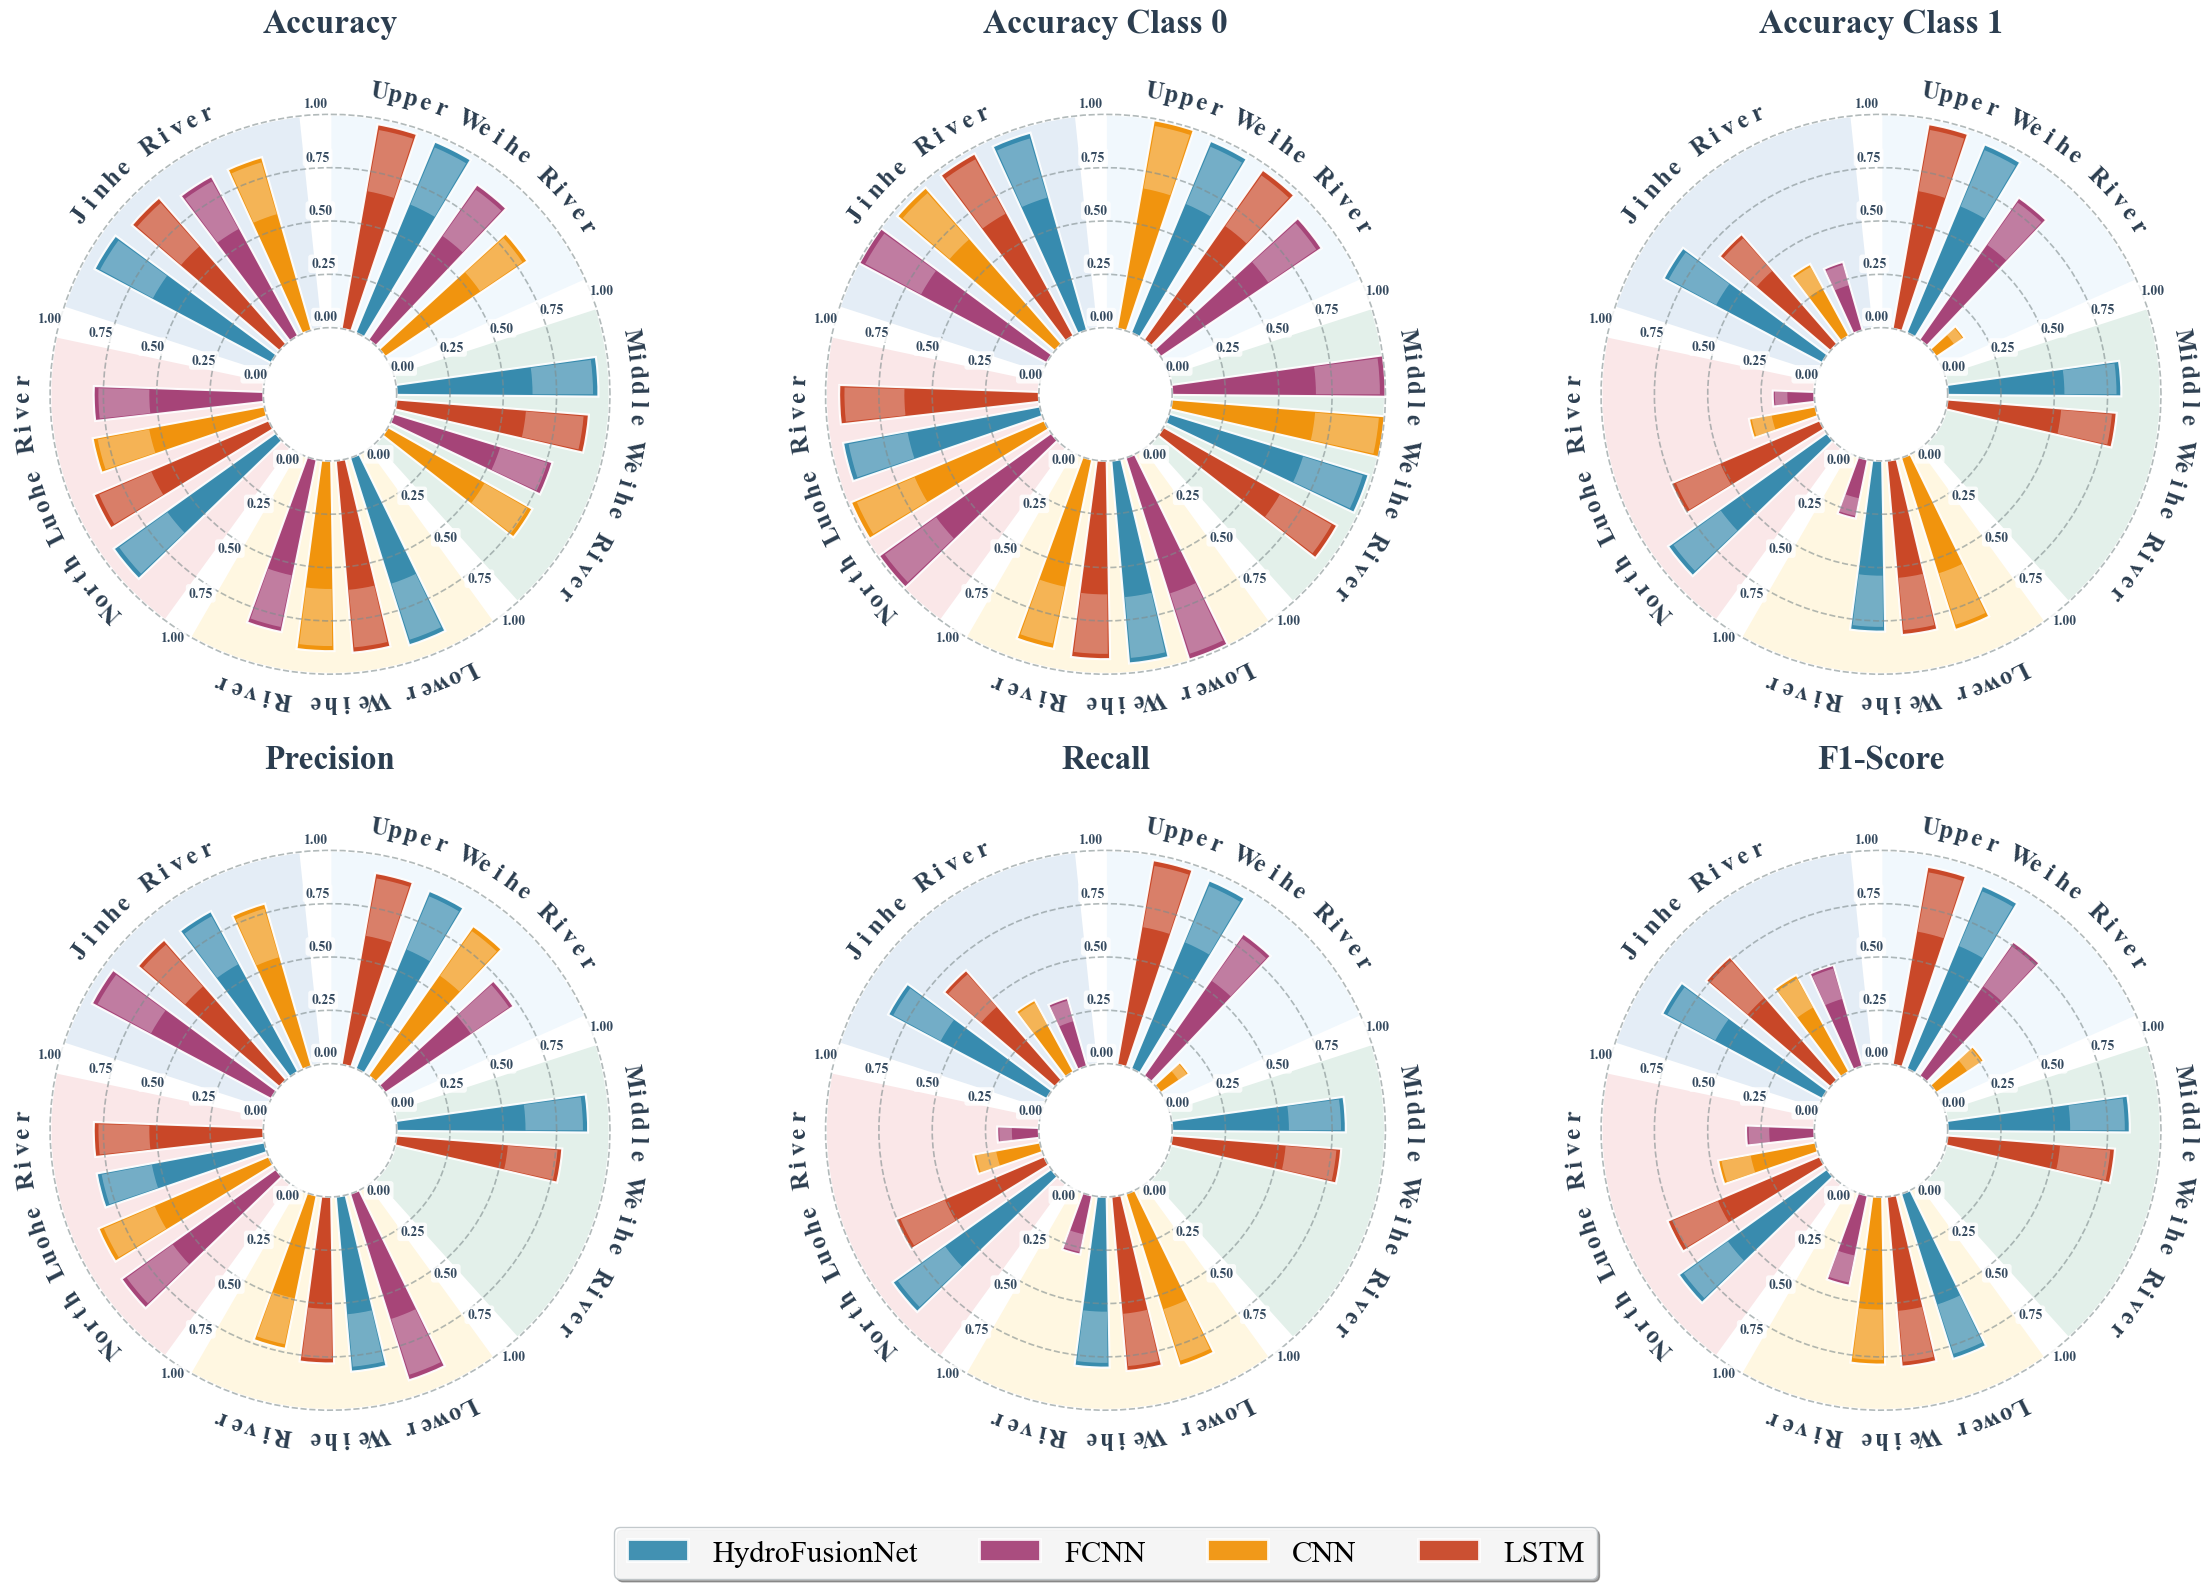

高清图像已保存为 'model_performance_optimized.png'


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.colors as mcolors
import os

# 优化全局字体设置
plt.rcParams['font.family'] = ['Times New Roman', 'DejaVu Sans']
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

class CircularBarPlot:
    def __init__(self, outer_radius, inner_radius, gap_angle, text_radius):
        """初始化类别、颜色和参数"""
        self.categories = ["Upper Weihe River", "Middle Weihe River", "Lower Weihe River", 
                          "North Luohe River", "Jinhe River"]
        self.models = ["HydroFusionNet", "FCNN", "CNN", "LSTM"]
        
        # 优化配色方案，使用更专业的颜色
        self.colors = {
            "HydroFusionNet": "#2E86AB",    # 专业蓝色
            "FCNN": "#A23B72",     # 深紫红
            "CNN": "#F18F01",      # 橙金色
            "LSTM": "#C73E1D"      # 深红色
        }
        
        # 优化类别背景色，使用渐变色系
        self.category_colors = {
            "Upper Weihe River": "#E8F4FD", 
            "Middle Weihe River": "#D1E7DD", 
            "Lower Weihe River": "#FFF3CD", 
            "North Luohe River": "#F8D7DA", 
            "Jinhe River": "#D3E2F0"
        }
        
        self.start_angle = 90
        self.gap_angle = gap_angle
        self.n_sectors = len(self.categories)
        self.sector_angle = (360 - self.gap_angle * self.n_sectors) / self.n_sectors
        self.outer_radius = outer_radius
        self.inner_radius = inner_radius
        self.text_radius = text_radius
        
        self.data = self.create_hardcoded_data()
    
    def create_hardcoded_data(self):
        """创建硬编码的性能数据"""
        watershed_mapping = {
            "渭河上游": "Upper Weihe River",
            "渭河中游": "Middle Weihe River", 
            "渭河下游": "Lower Weihe River",
            "北洛河": "North Luohe River",
            "泾河": "Jinhe River"
        }
        
        raw_data = {
            "HydroFusionNet": {
                "渭河上游": {"accuracy": 0.9699, "accuracy_class0": 0.9735, "accuracy_class1": 0.9559, "precision": 0.9028, "recall": 0.9559, "f1": 0.9286},
                "渭河中游": {"accuracy": 0.9457, "accuracy_class0": 0.9775, "accuracy_class1": 0.8140, "precision": 0.8974, "recall": 0.8140, "f1": 0.8537},
                "渭河下游": {"accuracy": 0.9217, "accuracy_class0": 0.9542, "accuracy_class1": 0.8000, "precision": 0.8235, "recall": 0.8000, "f1": 0.8116},
                "北洛河": {"accuracy": 0.9337, "accuracy_class0": 0.9389, "accuracy_class1": 0.9143, "precision": 0.8000, "recall": 0.9143, "f1": 0.8533},
                "泾河": {"accuracy": 0.9384, "accuracy_class0": 0.9635, "accuracy_class1": 0.8421, "precision": 0.8571, "recall": 0.8421, "f1": 0.8496}
            },
            "LSTM": {
                "渭河上游": {"accuracy": 0.9729, "accuracy_class0": 0.9728, "accuracy_class1": 0.9733, "precision": 0.9125, "recall": 0.9733, "f1": 0.9419},
                "渭河中游": {"accuracy": 0.9050, "accuracy_class0": 0.9360, "accuracy_class1": 0.7959, "precision": 0.7800, "recall": 0.7959, "f1": 0.7879},
                "渭河下游": {"accuracy": 0.9036, "accuracy_class0": 0.9291, "accuracy_class1": 0.8205, "precision": 0.7805, "recall": 0.8205, "f1": 0.8000},
                "北洛河": {"accuracy": 0.8916, "accuracy_class0": 0.9360, "accuracy_class1": 0.7561, "precision": 0.7949, "recall": 0.7561, "f1": 0.7750},
                "泾河": {"accuracy": 0.9094, "accuracy_class0": 0.9722, "accuracy_class1": 0.6833, "precision": 0.8723, "recall": 0.6833, "f1": 0.7664}
            },
            "FCNN": {
                "渭河上游": {"accuracy": 0.8886, "accuracy_class0": 0.9105, "accuracy_class1": 0.8133, "precision": 0.7262, "recall": 0.8133, "f1": 0.7673},
                "渭河中游": {"accuracy": 0.7783, "accuracy_class0": 1.0000, "accuracy_class1": 0.0000, "precision": 0.0000, "recall": 0.0000, "f1": 0.0000},
                "渭河下游": {"accuracy": 0.8253, "accuracy_class0": 0.9921, "accuracy_class1": 0.2821, "precision": 0.9167, "recall": 0.2821, "f1": 0.4314},
                "北洛河": {"accuracy": 0.7952, "accuracy_class0": 0.9920, "accuracy_class1": 0.1951, "precision": 0.8889, "recall": 0.1951, "f1": 0.3200},
                "泾河": {"accuracy": 0.8514, "accuracy_class0": 0.9954, "accuracy_class1": 0.3333, "precision": 0.9524, "recall": 0.3333, "f1": 0.4938}
            },
            "CNN": {
                "渭河上游": {"accuracy": 0.8042, "accuracy_class0": 0.9922, "accuracy_class1": 0.1600, "precision": 0.8571, "recall": 0.1600, "f1": 0.2697},
                "渭河中游": {"accuracy": 0.7783, "accuracy_class0": 1.0000, "accuracy_class1": 0.0000, "precision": 0.0000, "recall": 0.0000, "f1": 0.0000},
                "渭河下游": {"accuracy": 0.8916, "accuracy_class0": 0.9055, "accuracy_class1": 0.8462, "precision": 0.7333, "recall": 0.8462, "f1": 0.7857},
                "北洛河": {"accuracy": 0.8193, "accuracy_class0": 0.9840, "accuracy_class1": 0.3171, "precision": 0.8667, "recall": 0.3171, "f1": 0.4643},
                "泾河": {"accuracy": 0.8442, "accuracy_class0": 0.9722, "accuracy_class1": 0.3833, "precision": 0.7931, "recall": 0.3833, "f1": 0.5169}
            }
        }
        
        data_dict = {
            "accuracy": [],
            "accuracy_class0": [],
            "accuracy_class1": [],
            "precision": [],
            "recall": [],
            "f1": []
        }
        
        for metric in ["accuracy", "accuracy_class0", "accuracy_class1", "precision", "recall", "f1"]:
            metric_data = []
            for model in self.models:
                for watershed_cn, watershed_en in watershed_mapping.items():
                    metric_data.append({
                        "category": watershed_en,
                        "model": model,
                        "value": raw_data[model][watershed_cn][metric]
                    })
            data_dict[metric] = pd.DataFrame(metric_data)
        
        return data_dict

    def add_curved_text(self, ax, text, mid_angle, radius, direction='counterclockwise'):
        """在指定角度和半径处添加弯曲的标签文本"""
        text_length = len(text)
        char_angle_width = 2.8
        total_text_angle = text_length * char_angle_width
        
        if direction == 'counterclockwise':
            start_angle = mid_angle + total_text_angle / 2
            end_angle = mid_angle - total_text_angle / 2
            angles = np.linspace(start_angle, end_angle, text_length)
        else:
            start_angle = mid_angle - total_text_angle / 2
            end_angle = mid_angle + total_text_angle / 2
            angles = np.linspace(start_angle, end_angle, text_length)
        
        for i, char in enumerate(text):
            char_rad = np.radians(angles[i])
            x = radius * np.cos(char_rad)
            y = radius * np.sin(char_rad)
            rotation = angles[i] - 90
            if 90 < angles[i] < 270:
                rotation += 180
            # 优化字体样式
            ax.text(x, y, char, ha='center', va='center', fontsize=18, weight='bold',
                    rotation=rotation, family='Times New Roman', color='#2C3E50')

    def get_sorted_models_by_metric(self, data, category, metric_name):
        """根据指标值对模型进行排序（降序）"""
        category_data = data[data['category'] == category]
        if category_data.empty:
            return self.models
        
        model_scores = []
        for model in self.models:
            model_data = category_data[category_data['model'] == model]
            if not model_data.empty:
                score = model_data['value'].values[0]
                model_scores.append((model, score))
            else:
                model_scores.append((model, 0))
        
        model_scores.sort(key=lambda x: x[1], reverse=True)
        return [model for model, score in model_scores]

    def plot_model(self, data, ax, metric_name):
        """绘制环状图"""
        ax.clear()
        ax.set_xlim(-self.outer_radius - 0.3, self.outer_radius + 0.3)
        ax.set_ylim(-self.outer_radius - 0.3, self.outer_radius + 0.3)
        ax.set_aspect('equal')
        ax.axis('off')
        
        # 优化标题样式
        ax.set_title(metric_name, fontsize=24, weight='bold', pad=30, 
                    color='#2C3E50', family='Times New Roman')
        
        # 绘制扇形背景，添加渐变效果
        for i, category in enumerate(self.categories):
            sector_start = self.start_angle - i * (self.sector_angle + self.gap_angle)
            sector_end = sector_start - self.sector_angle
            bg_color = mcolors.to_rgba(self.category_colors[category], alpha=0.6)
            main_wedge = Wedge((0, 0), self.outer_radius, sector_end, sector_start,
                              width=self.outer_radius - self.inner_radius, facecolor=bg_color,
                              edgecolor='white', linewidth=2, zorder=1)
            ax.add_patch(main_wedge)
            
            mid_angle = (sector_start + sector_end) / 2
            self.add_curved_text(ax, category, mid_angle, self.text_radius, direction='counterclockwise')
        
        # 绘制柱状图
        for i, category in enumerate(self.categories):
            sector_start = self.start_angle - i * (self.sector_angle + self.gap_angle)
            sector_end = sector_start - self.sector_angle
            mid_angle = (sector_start + sector_end) / 2
            
            category_data = data[data['category'] == category]
            
            if not category_data.empty:
                sorted_models = self.get_sorted_models_by_metric(data, category, metric_name)
                
                bar_width_angle = 8.5
                gap_width_angle = 4
                n_bars = len(sorted_models)
                total_width_angle = n_bars * bar_width_angle + (n_bars - 1) * gap_width_angle
                start_angle = mid_angle + total_width_angle / 2
                
                for j, model in enumerate(sorted_models):
                    bar_end_angle = start_angle - j * (bar_width_angle + gap_width_angle)
                    bar_start_angle = bar_end_angle - bar_width_angle
                    
                    model_data = category_data[category_data['model'] == model]
                    if not model_data.empty:
                        bar_height = model_data['value'].values[0]
                        if bar_height > 1:
                            bar_height /= 100
                        
                        inner_radius = self.inner_radius
                        outer_radius = inner_radius + bar_height * (self.outer_radius - self.inner_radius)
                        
                        color = self.colors[model]
                        
                        # 添加渐变和阴影效果
                        bar_wedge = Wedge((0, 0), outer_radius, bar_start_angle, bar_end_angle,
                                         width=outer_radius - inner_radius,
                                         facecolor=color,
                                         edgecolor='white', linewidth=1.5, alpha=0.95, zorder=2)
                        ax.add_patch(bar_wedge)
                        
                        # 添加高光效果
                        highlight_wedge = Wedge((0, 0), outer_radius * 0.98, 
                                              bar_start_angle + 0.5, bar_end_angle - 0.5,
                                              width=(outer_radius - inner_radius) * 0.3,
                                              facecolor='white', alpha=0.3, zorder=3)
                        ax.add_patch(highlight_wedge)
        
        # 优化径向刻度线
        for tick_val in np.arange(0.0, 1.1, 0.25):
            tick_radius = self.inner_radius + tick_val * (self.outer_radius - self.inner_radius)
            angles = np.linspace(0, 360, 100)
            x_ticks = tick_radius * np.cos(np.radians(angles))
            y_ticks = tick_radius * np.sin(np.radians(angles))
            ax.plot(x_ticks, y_ticks, '--', color='#7F8C8D', alpha=0.6, 
                   linewidth=1.2, zorder=3)
            
            # 优化刻度标签
            for i in range(self.n_sectors):
                gap_center_angle = self.start_angle - (i * (self.sector_angle + self.gap_angle) + 
                                                     self.sector_angle + self.gap_angle / 2)
                gap_center_rad = np.radians(gap_center_angle)
                label_x = (tick_radius + 0.08) * np.cos(gap_center_rad)
                label_y = (tick_radius + 0.08) * np.sin(gap_center_rad)
                ax.text(label_x, label_y, f'{tick_val:.2f}', ha='center', va='center',
                       fontsize=10, color='#34495E', weight='bold', zorder=4,
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', 
                               alpha=0.8, edgecolor='none'))

def create_circular_plots(outer_radius, inner_radius, gap_angle, text_radius):
    """创建并保存环状图"""
    plotter = CircularBarPlot(outer_radius=outer_radius, inner_radius=inner_radius, 
                             gap_angle=gap_angle, text_radius=text_radius)
    
    # 创建更大的图像
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    
    # 设置整体背景色
    fig.patch.set_facecolor('white')
    
    # 绘制六个指标的图
    plotter.plot_model(plotter.data["accuracy"], axes[0, 0], "Accuracy")
    plotter.plot_model(plotter.data["accuracy_class0"], axes[0, 1], "Accuracy Class 0")
    plotter.plot_model(plotter.data["accuracy_class1"], axes[0, 2], "Accuracy Class 1")
    plotter.plot_model(plotter.data["precision"], axes[1, 0], "Precision")
    plotter.plot_model(plotter.data["recall"], axes[1, 1], "Recall")
    plotter.plot_model(plotter.data["f1"], axes[1, 2], "F1-Score")
    
    # 优化图例样式
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color, 
                                   edgecolor='white', linewidth=2, alpha=0.9) 
                       for color in plotter.colors.values()]
    
    fig.legend(legend_elements, plotter.colors.keys(), loc='lower center', 
               ncol=4, fontsize=22, frameon=True, bbox_to_anchor=(0.5, -0.02),
               fancybox=True, shadow=True, framealpha=0.9,
               facecolor='white', edgecolor='#BDC3C7')
    
    # 优化布局
    plt.subplots_adjust(left=0.03, right=0.97, top=0.93, bottom=0.07, 
                       hspace=0.15, wspace=0.1)
    
    # 保存为高清PNG格式
    plt.savefig("model_performance_optimized.png", dpi=600, bbox_inches='tight', 
                facecolor='white', edgecolor='none', format='png',
                pad_inches=0.2)
    plt.show()
    
    print("高清图像已保存为 'model_performance_optimized.png'")

# 运行优化后的函数
create_circular_plots(outer_radius=2.1, inner_radius=0.5, gap_angle=6, text_radius=2.3)
